<a href="https://colab.research.google.com/github/JessiPool/KaggleXProject/blob/regression/regressioninventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Sample Zillow inventory and sales, US (national), 2011-2020

In [ ]:
df_usinv = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/usinv_merge.csv')

In [ ]:
df_usinv

,median_household_income,state,year_only,monthly_housing_budget,affordability_pct_US,average_CPI,avg_stock_market_closing_value,GDP_by_billion_USD,Per_Capita_USD,Annual_Percentage_Growth_Change,...,Medicare_in_Billions_USD,Medicaid_in_Billions_USD,Other_Health_Insurance_Programs_in_Billions_USD,Other_Third_Party_Payers_in_Billions_USD,Total_Federal_Grants_in_Millions,Total_Federal_Loans_in_Millions,Federal_Work_Study_in_Millions,Education_Tax_Benefits_in_Millions,TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions,NONFEDERAL_LOANS_in_Millions
0,61140,US,2017,1426.600000,94.621812,245.121000,21750.20375,19477.34,59907.75,2.2419,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
1,56520,US,2015,1318.800000,95.672898,237.001750,17587.02917,18206.02,56762.73,2.7064,...,606.2,484.5,115.2,244.6,50036.0,111734.0,1123.0,20630.0,272117.0,11600.0
2,68010,US,2020,1586.900000,94.771427,258.850583,26890.67360,21060.47,63528.63,-2.7678,...,759.6,587.7,149.4,482.3,43165.0,95422.0,1177.0,13320.0,258117.0,15300.0
3,53590,US,2013,1250.433333,96.150835,232.951750,15009.52278,16843.19,53291.13,1.8419,...,553.5,405.7,100.8,234.2,52474.0,121243.0,1139.0,21740.0,278357.0,10900.0
4,63180,US,2018,1474.200000,95.372919,251.099500,25046.85735,20533.06,62823.31,2.9454,...,696.7,531.5,129.9,284.5,45407.0,103195.0,1085.0,16110.0,265610.0,13200.0
5,50050,US,2011,1167.833333,96.827990,224.923000,11957.57000,15599.73,50065.97,1.5499,...,511.8,373.7,94.6,211.0,58792.0,131971.0,1211.0,26690.0,294285.0,9600.0
6,59040,US,2016,1377.600000,95.587515,240.005417,17927.10734,18695.11,57866.74,1.6675,...,629.0,503.4,119.0,259.6,47924.0,109213.0,1122.0,19630.0,270348.0,12200.0
7,53660,US,2014,1252.066667,95.713207,236.715000,16777.69091,17550.68,55123.85,2.2878,...,579.3,446.9,107.1,237.5,51430.0,117865.0,1141.0,21480.0,276848.0,11100.0
8,68700,US,2019,1603.000000,95.671621,255.651667,26379.58702,21380.98,65120.39,2.2944,...,746.6,553.6,138.1,302.0,44442.0,98481.0,1208.0,14600.0,261149.0,14100.0
9,51020,US,2012,1190.466667,96.840296,229.586083,12966.43960,16253.97,51784.42,2.2807,...,533.6,388.3,97.3,225.2,53444.0,128940.0,1171.0,24300.0,286332.0,10000.0


In [ ]:
# Seaborn Pairplot, inventory and sales, US (national), 2011-2020

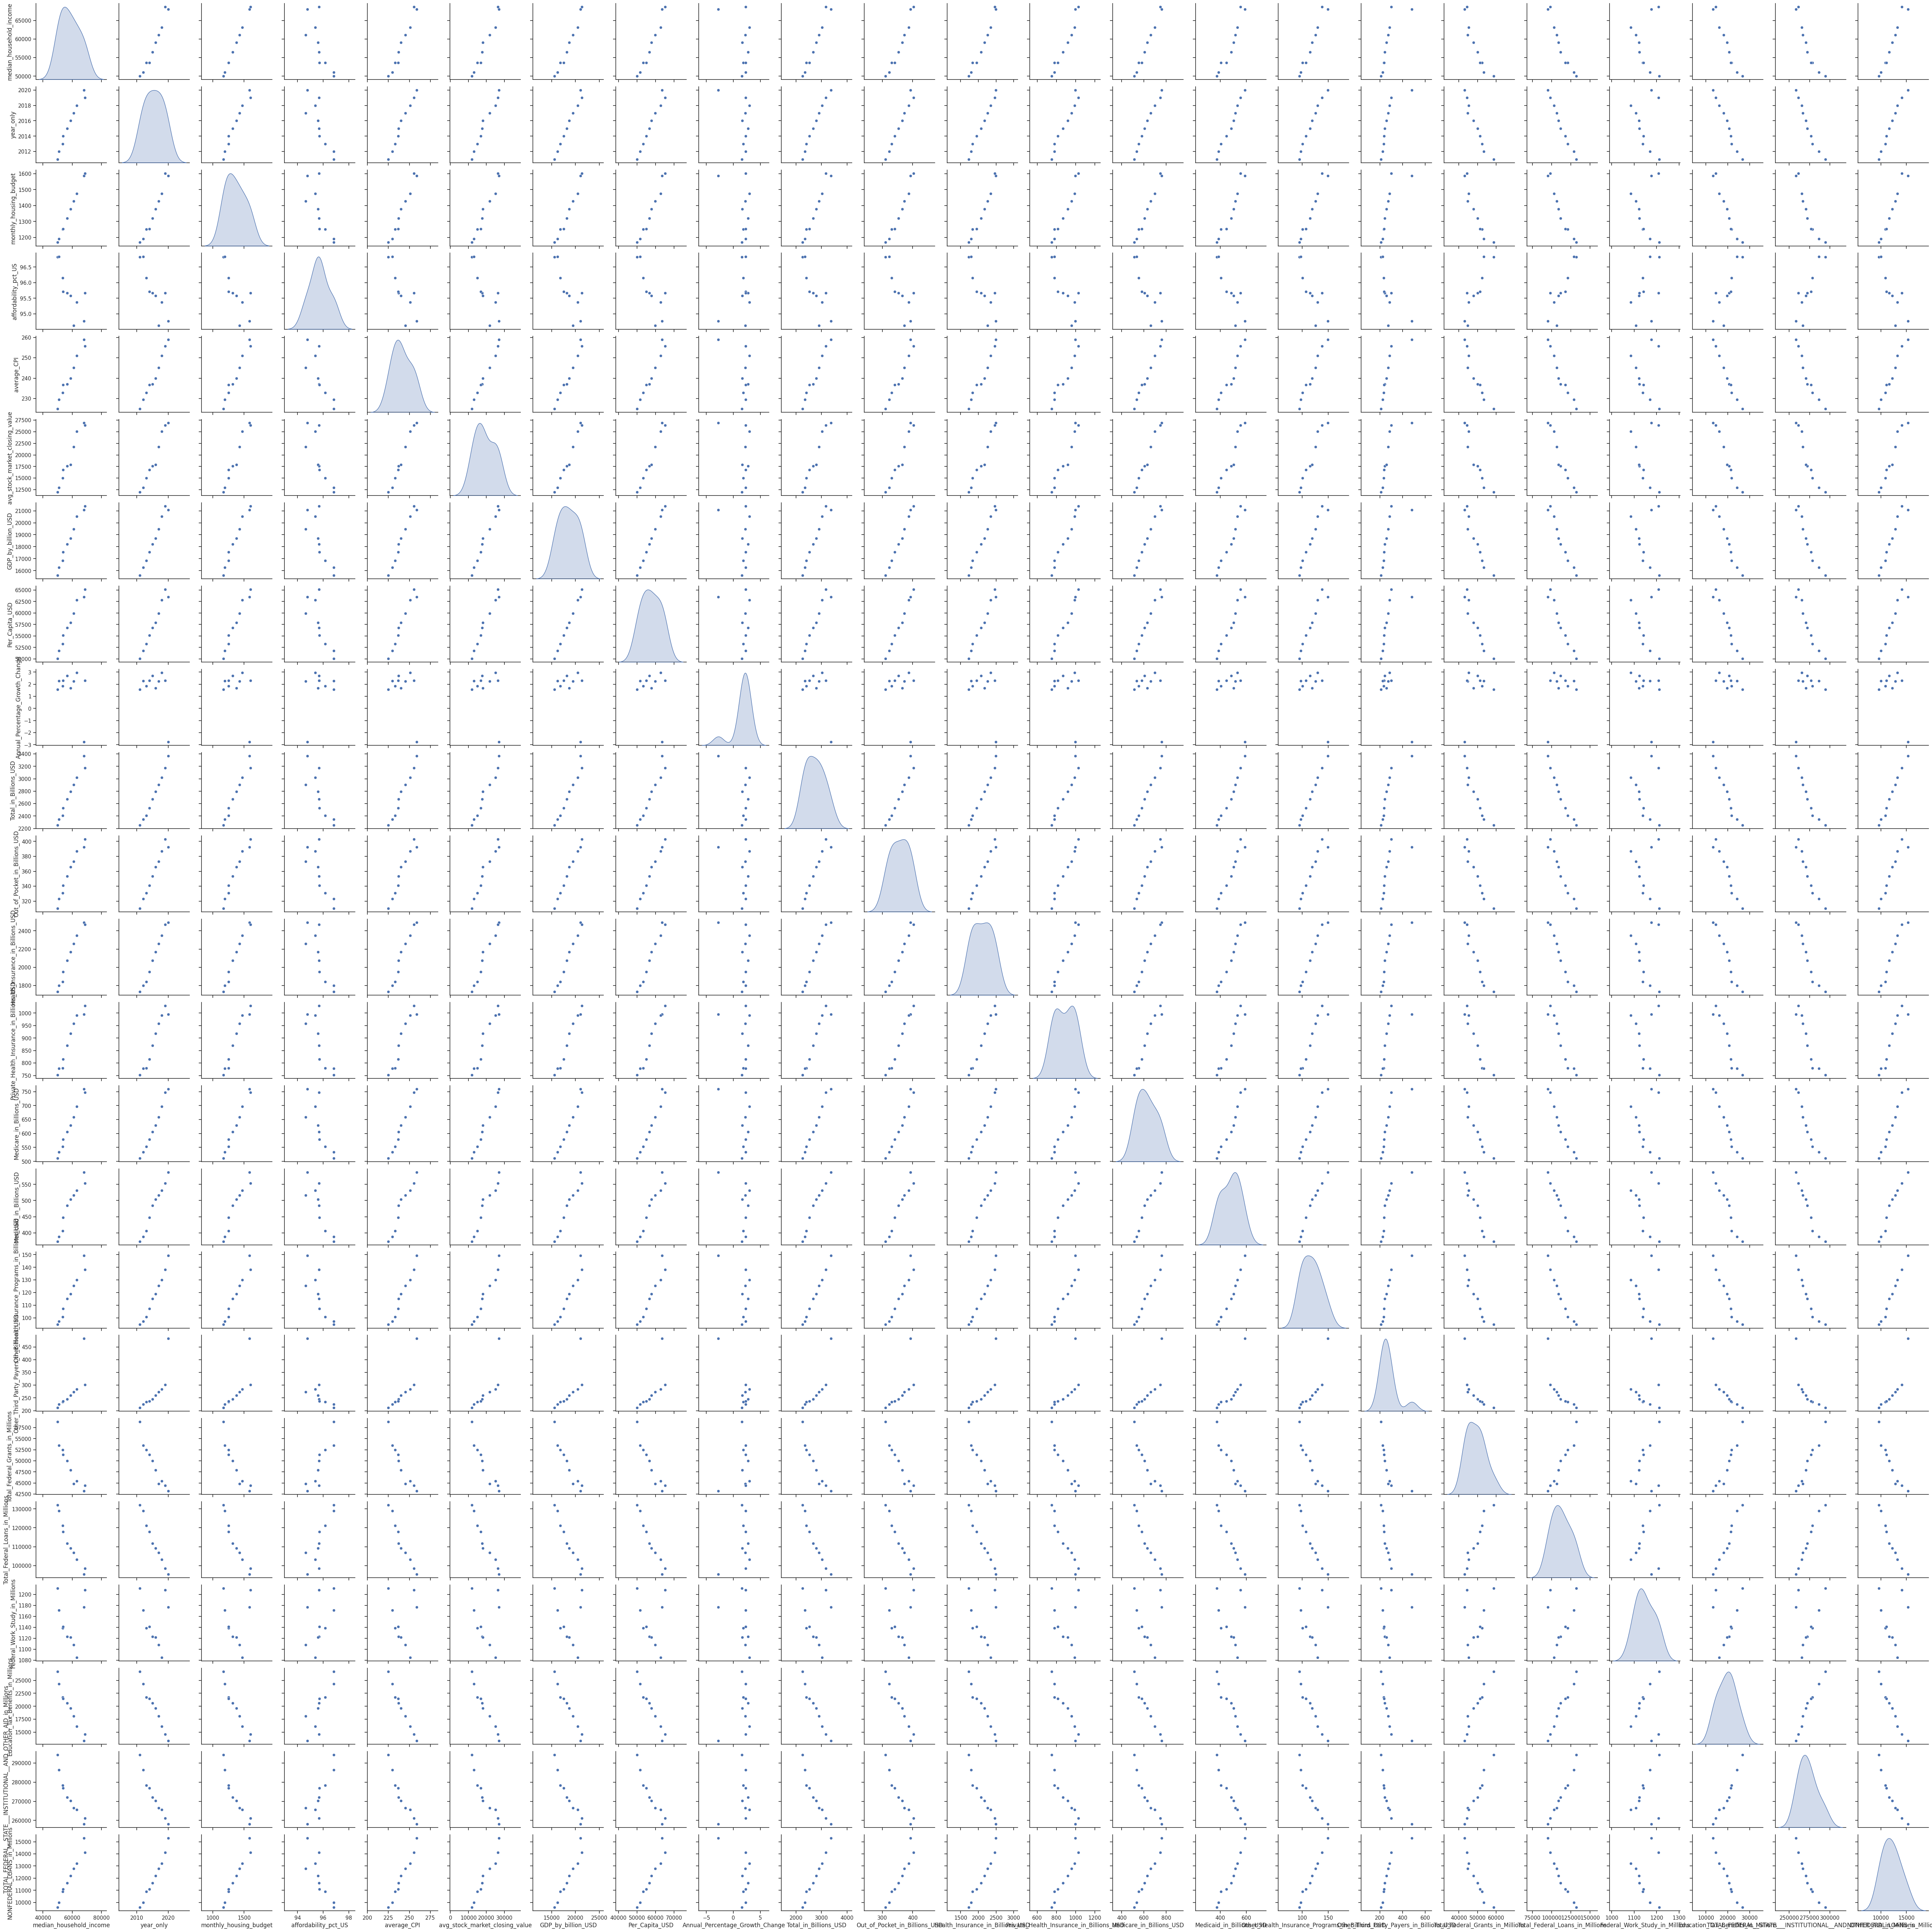

In [ ]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(df_usinv, diag_kind='kde', kind='scatter')
plt.show()

In [ ]:
# Ridge Regression, inventory and sales, US (national), 2011-2020

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming 'df_st' is your DataFrame with predictor variables and the outcome variable
X = df_usinv.drop(['affordability_pct_US', 'state', 'year_only', 'monthly_housing_budget', 'median_household_income'], axis=1)  # Predictor variables
y = df_usinv['affordability_pct_US']  # Outcome variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Ridge regression model with a specified alpha (regularization strength)
alpha = 100  # set to 100 per the recommendation of the Ridge analysis
ridge_model = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

Ridge(alpha=100)

In [ ]:
# Predict the target values on the test set
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.17648641966940343


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search over
alphas = [0.01, 0.1, 1, 10, 100]

# Create a parameter grid for the grid search
param_grid = {'alpha': alphas}

# Create a Ridge regression model
ridge_model = Ridge()

# Perform a grid search with cross-validation to find the best alpha
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Train a Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

Ridge(alpha=0.01)

In [ ]:
# Creating visualizations for Ridge Regression, Inventory and Sales US values, 2011-2020

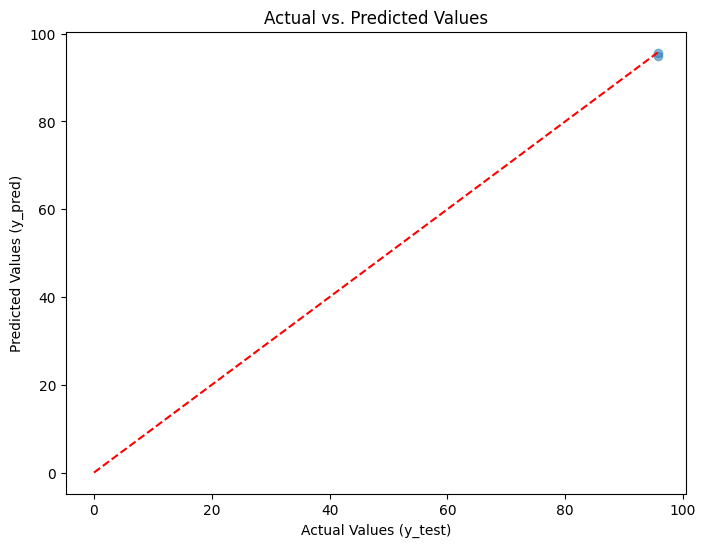

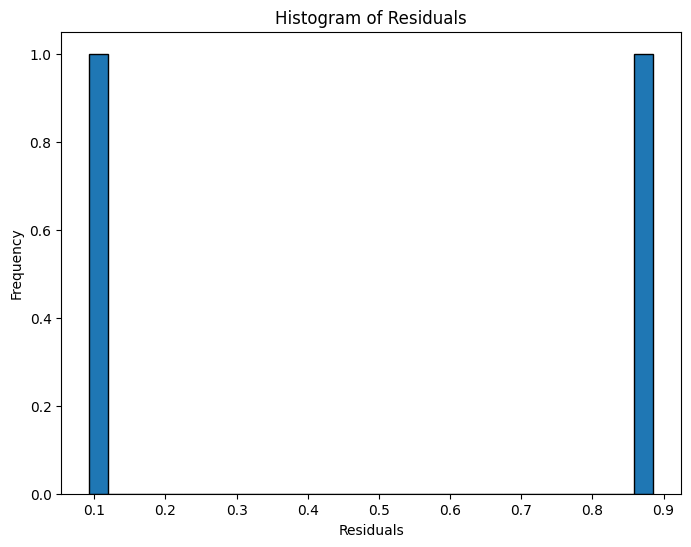

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line to visualize perfect predictions
max_value = max(max(y_test), max(y_pred))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()

# Create a histogram of the residuals (the difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

plt.show()

In [ ]:
# Lasso Regression, inventory and sales, US (national), 2011-2020

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df_usinv.head()

,median_household_income,state,year_only,monthly_housing_budget,affordability_pct_US,average_CPI,avg_stock_market_closing_value,GDP_by_billion_USD,Per_Capita_USD,Annual_Percentage_Growth_Change,...,Medicare_in_Billions_USD,Medicaid_in_Billions_USD,Other_Health_Insurance_Programs_in_Billions_USD,Other_Third_Party_Payers_in_Billions_USD,Total_Federal_Grants_in_Millions,Total_Federal_Loans_in_Millions,Federal_Work_Study_in_Millions,Education_Tax_Benefits_in_Millions,TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions,NONFEDERAL_LOANS_in_Millions
0,61140,US,2017,1426.600000,94.621812,245.121000,21750.20375,19477.34,59907.75,2.2419,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
1,56520,US,2015,1318.800000,95.672898,237.001750,17587.02917,18206.02,56762.73,2.7064,...,606.2,484.5,115.2,244.6,50036.0,111734.0,1123.0,20630.0,272117.0,11600.0
2,68010,US,2020,1586.900000,94.771427,258.850583,26890.67360,21060.47,63528.63,-2.7678,...,759.6,587.7,149.4,482.3,43165.0,95422.0,1177.0,13320.0,258117.0,15300.0
3,53590,US,2013,1250.433333,96.150835,232.951750,15009.52278,16843.19,53291.13,1.8419,...,553.5,405.7,100.8,234.2,52474.0,121243.0,1139.0,21740.0,278357.0,10900.0
4,63180,US,2018,1474.200000,95.372919,251.099500,25046.85735,20533.06,62823.31,2.9454,...,696.7,531.5,129.9,284.5,45407.0,103195.0,1085.0,16110.0,265610.0,13200.0


In [ ]:
X = df_usinv[['average_CPI', 'avg_stock_market_closing_value', 'GDP_by_billion_USD', 'Per_Capita_USD', 'Out_of_Pocket_in_Billions_USD', 'Total_Federal_Loans_in_Millions']]
y = df_usinv['affordability_pct_US']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3961901363479393


In [ ]:
coef = lasso.coef_
feature_names = X.columns

for feature, weight in zip(feature_names, coef):
    print(f"{feature}: {weight}")

average_CPI: 0.0
avg_stock_market_closing_value: 0.0
GDP_by_billion_USD: 0.0
Per_Capita_USD: 0.0
Out_of_Pocket_in_Billions_USD: 0.0
Total_Federal_Loans_in_Millions: 5.985884108923974e-05


In [ ]:
lasso_coeffs = lasso.coef_
feature_names = X.columns

# Print the selected predictors and their corresponding coefficients
for feature, coef in zip(feature_names, lasso_coeffs):
    if coef != 0:
        print(f'{feature}: {coef}')

Total_Federal_Loans_in_Millions: 5.985884108923974e-05


In [ ]:
import matplotlib.pyplot as plt

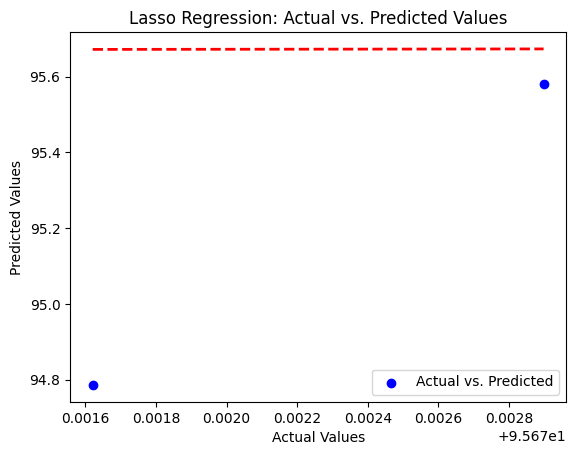

In [ ]:
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs. Predicted Values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')
plt.show()

In [ ]:
# Linear Regression Analysis, inventory and sales, US (national), 2011-2020

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df_usinv.drop(['affordability_pct_US', 'state', 'year_only', 'monthly_housing_budget'], axis=1)
y = df_usinv['affordability_pct_US']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
c = lr.intercept_
c

22.835759942854992

In [ ]:
m = lr.coef_

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

y_pred_train

array([96.82798993, 94.62181154, 95.7132066 , 94.77142722, 96.84029614,
       95.3729189 , 96.15083507, 95.5875153 ])

In [ ]:
import matplotlib.pyplot as plt

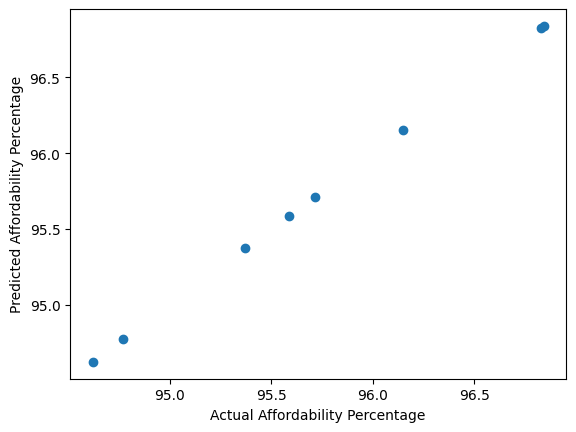

In [ ]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Affordability Percentage")
plt.ylabel("Predicted Affordability Percentage")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, y_pred_train)

1.0

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
y_pred_test = lr.predict(X_test)

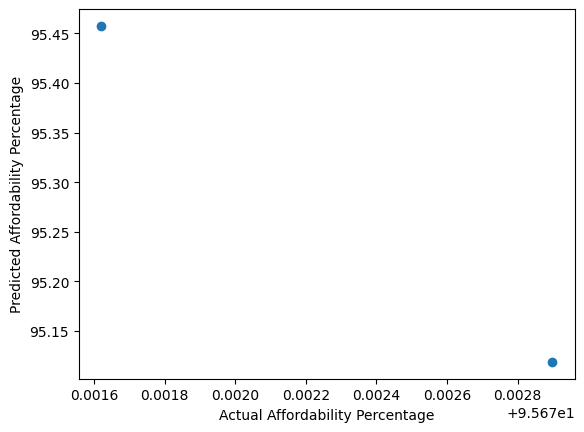

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Affordability Percentage")
plt.ylabel("Predicted Affordability Percentage")
plt.show()

In [ ]:
r2_score(y_test, y_pred_test)

-432294.6621210245

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.17641596576459284


In [ ]:
# Distribution of affordability, inventory and sales true/false categorical data

In [ ]:
dflog_stinv = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/inv_state_pct_mortgage.csv')
dflog_stinv

,value,state,year_only,median_household_income,monthly_mortgage_payment,is_affordable
0,147588.0,AL,2011,42590,11892.313067,True
1,145830.0,AL,2011,42590,11750.657333,True
2,167000.0,AL,2011,42590,13456.488889,False
3,163500.0,AL,2011,42590,13174.466667,False
4,92000.0,AL,2011,42590,7413.155556,True
...,...,...,...,...,...,...
151644,330067.0,WY,2020,73780,26596.065378,False
151645,1186875.0,WY,2020,73780,95635.750000,False
151646,243500.0,WY,2020,73780,19620.688889,True
151647,281120.0,WY,2020,73780,22652.024889,False


In [ ]:
dflog_stinv['state'] = dflog_stinv['state'].astype('category')
dflog_stinv['state'] = dflog_stinv['state'].cat.codes

In [ ]:
dflog_stinv['is_affordable'] = dflog_stinv['is_affordable'].astype('category')
dflog_stinv['is_affordable'] = dflog_stinv['is_affordable'].cat.codes

In [ ]:
affordability_distribution = dflog_stinv['is_affordable'].value_counts()
print(affordability_distribution)

1    111501
0     40148
Name: is_affordable, dtype: int64


In [ ]:
distribution = dflog_stinv['is_affordable'].value_counts(normalize=True) * 100
print(distribution)

1    73.525707
0    26.474293
Name: is_affordable, dtype: float64


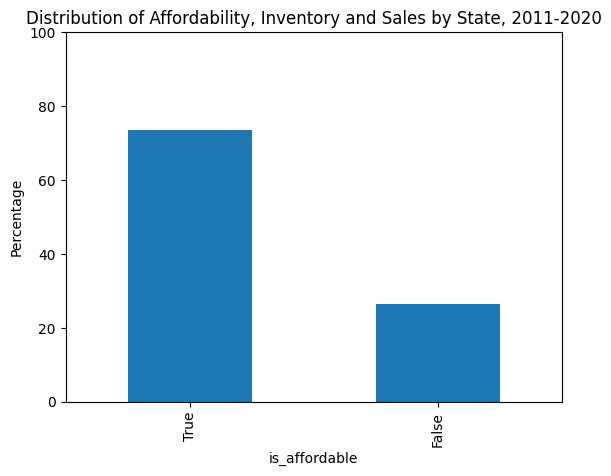

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named dflog_stinv with a 'is_affordable' column

# Count the occurrences of True and False in the 'is_affordable' column and calculate percentages
affordability_counts = dflog_stinv['is_affordable'].value_counts(normalize=True) * 100

# Replace 1 with True and 0 with False for the x-axis labels
affordability_counts.index = ['True' if label == 1 else 'False' for label in affordability_counts.index]

# Plot the distribution as percentages with y-axis ranging from 0 to 100
affordability_counts.plot(kind='bar')
plt.title('Distribution of Affordability, Inventory and Sales by State, 2011-2020')
plt.xlabel('is_affordable')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.show()

In [ ]:
# ADABoost algorithm, df_usinv (inventory and sales, US aggregated data, percentage, 2011-2020)

In [ ]:
df_usinv.head()

,median_household_income,state,year_only,monthly_housing_budget,affordability_pct_US,average_CPI,avg_stock_market_closing_value,GDP_by_billion_USD,Per_Capita_USD,Annual_Percentage_Growth_Change,...,Medicare_in_Billions_USD,Medicaid_in_Billions_USD,Other_Health_Insurance_Programs_in_Billions_USD,Other_Third_Party_Payers_in_Billions_USD,Total_Federal_Grants_in_Millions,Total_Federal_Loans_in_Millions,Federal_Work_Study_in_Millions,Education_Tax_Benefits_in_Millions,TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions,NONFEDERAL_LOANS_in_Millions
0,61140,US,2017,1426.600000,94.621812,245.121000,21750.20375,19477.34,59907.75,2.2419,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
1,56520,US,2015,1318.800000,95.672898,237.001750,17587.02917,18206.02,56762.73,2.7064,...,606.2,484.5,115.2,244.6,50036.0,111734.0,1123.0,20630.0,272117.0,11600.0
2,68010,US,2020,1586.900000,94.771427,258.850583,26890.67360,21060.47,63528.63,-2.7678,...,759.6,587.7,149.4,482.3,43165.0,95422.0,1177.0,13320.0,258117.0,15300.0
3,53590,US,2013,1250.433333,96.150835,232.951750,15009.52278,16843.19,53291.13,1.8419,...,553.5,405.7,100.8,234.2,52474.0,121243.0,1139.0,21740.0,278357.0,10900.0
4,63180,US,2018,1474.200000,95.372919,251.099500,25046.85735,20533.06,62823.31,2.9454,...,696.7,531.5,129.9,284.5,45407.0,103195.0,1085.0,16110.0,265610.0,13200.0


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# X should contain the predictor variables, and y should contain the outcome variable
X = df_usinv.drop(['state', 'affordability_pct_US'], axis=1)
y = df_usinv['affordability_pct_US']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostRegressor with a Random Forest base estimator
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=10)
adaboost_regressor = AdaBoostRegressor(estimator=estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.32026318605029863


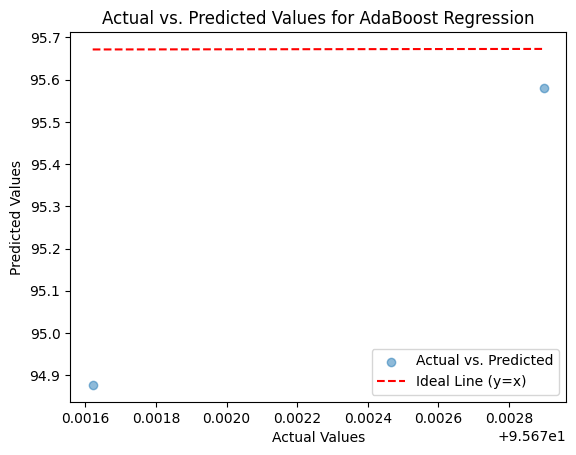

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained and made predictions with your AdaBoostRegressor model

# Create a range of values for the line (1:1 relationship)
line_values = np.linspace(min(y_test), max(y_test), 100)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot(line_values, line_values, color='red', linestyle='--', label='Ideal Line (y=x)')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for AdaBoost Regression")
plt.legend()
plt.show()

In [ ]:
# ADABoost algorithm, df_stinv (inventory and sales by state, percentage, 2011-2020)

In [ ]:
df_stinv = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/stateinv_merge.csv')
df_stinv['state'] = df_stinv['state'].astype('category')
df_stinv['state'] = df_stinv['state'].cat.codes
df_stinv

,median_household_income,state,year_only,affordability_pct_state,average_CPI,avg_stock_market_closing_value,GDP_by_billion_USD,Per_Capita_USD,Total_in_Billions_USD,Out_of_Pocket_in_Billions_USD,...,Medicare_in_Billions_USD,Medicaid_in_Billions_USD,Other_Health_Insurance_Programs_in_Billions_USD,Other_Third_Party_Payers_in_Billions_USD,Total_Federal_Grants_in_Millions,Total_Federal_Loans_in_Millions,Federal_Work_Study_in_Millions,Education_Tax_Benefits_in_Millions,TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions,NONFEDERAL_LOANS_in_Millions
0,91960,0,2017,NaN,245.121,21750.203745,19477.34,59907.75,2903.8,372.9,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
1,50870,1,2017,100.000000,245.121,21750.203745,19477.34,59907.75,2903.8,372.9,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
2,58660,2,2017,100.000000,245.121,21750.203745,19477.34,59907.75,2903.8,372.9,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
3,70390,3,2017,100.000000,245.121,21750.203745,19477.34,59907.75,2903.8,372.9,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
4,82580,4,2017,82.280928,245.121,21750.203745,19477.34,59907.75,2903.8,372.9,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,69010,47,2012,NaN,229.586,12966.439603,16253.97,51784.42,2346.2,323.2,...,533.6,388.3,97.3,225.2,53444.0,128940.0,1171.0,24300.0,286332.0,10000.0
516,77220,48,2012,100.000000,229.586,12966.439603,16253.97,51784.42,2346.2,323.2,...,533.6,388.3,97.3,225.2,53444.0,128940.0,1171.0,24300.0,286332.0,10000.0
517,65910,49,2012,100.000000,229.586,12966.439603,16253.97,51784.42,2346.2,323.2,...,533.6,388.3,97.3,225.2,53444.0,128940.0,1171.0,24300.0,286332.0,10000.0
518,54080,50,2012,100.000000,229.586,12966.439603,16253.97,51784.42,2346.2,323.2,...,533.6,388.3,97.3,225.2,53444.0,128940.0,1171.0,24300.0,286332.0,10000.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_17, *['median_household_income'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['state'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['year_only'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_20, *['index', 'median_household_income'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_21, *['median_household_income', 'state'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_22, *['state', 'year_only'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_23, *['year_only', 'affordability_pct_state'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['index', 'median_household_income', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['index', 'state', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_26, *['index', 'year_only', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_27, *['index', 'affordability_pct_state', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_28, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_29, *['median_household_income'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_30, *['state'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_31, *['year_only'], **{})
chart

In [ ]:
df_stinv.dropna(axis=0, inplace=True)

In [ ]:
# X should contain the predictor variables, and y should contain the outcome variable
X = df_stinv.drop(['affordability_pct_state', 'median_household_income'], axis=1)
y = df_stinv['affordability_pct_state']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostRegressor with a Random Forest base estimator
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=10)
adaboost_regressor = AdaBoostRegressor(estimator=estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.221928355203449


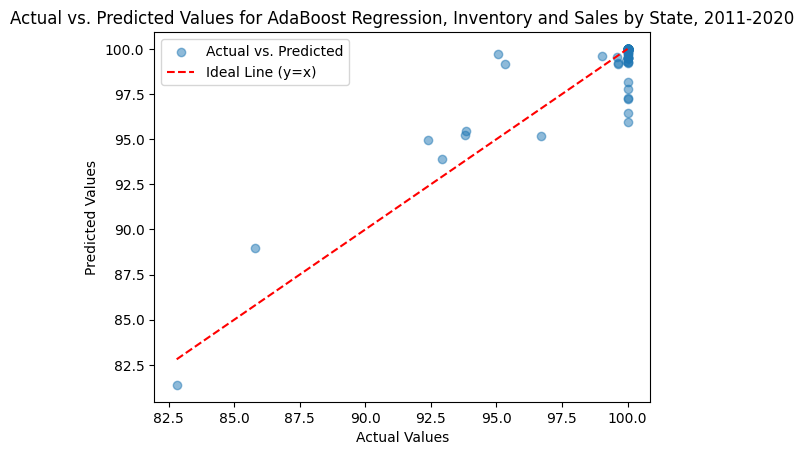

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained and made predictions with your AdaBoostRegressor model

# Create a range of values for the line (1:1 relationship)
line_values = np.linspace(min(y_test), max(y_test), 100)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot(line_values, line_values, color='red', linestyle='--', label='Ideal Line (y=x)')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for AdaBoost Regression, Inventory and Sales by State, 2011-2020")
plt.legend()
plt.show()

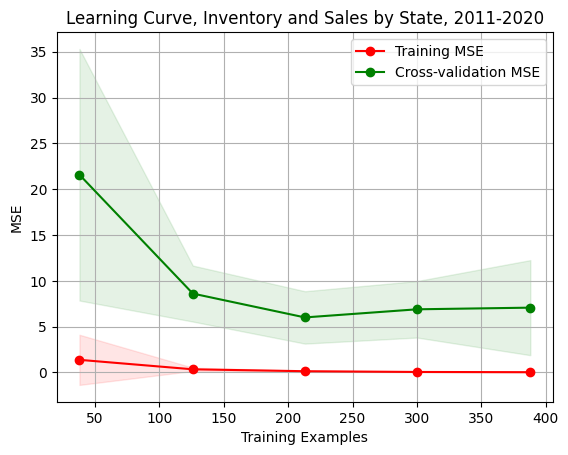

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    adaboost_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Create a learning curve plot
plt.figure()
plt.title("Learning Curve, Inventory and Sales by State, 2011-2020")
plt.xlabel("Training Examples")
plt.ylabel("MSE")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MSE")

plt.legend(loc="best")
plt.show()

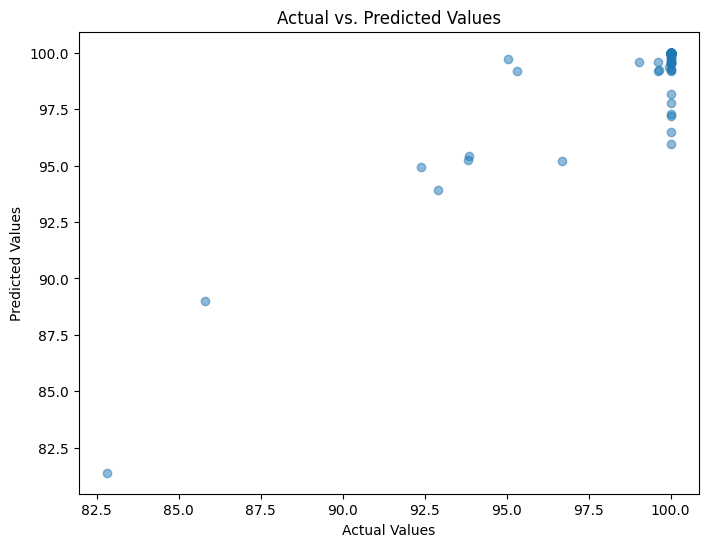

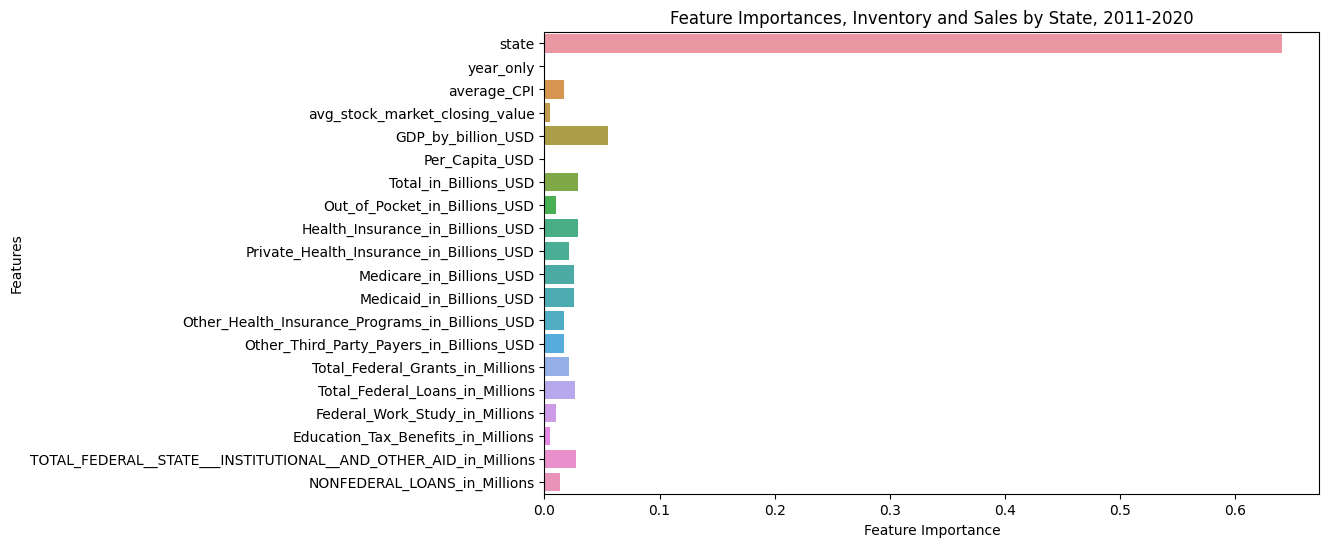

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Visualize feature importances from the Random Forest base estimator
feature_importances = adaboost_regressor.estimators_[0].feature_importances_

# Assuming X is a DataFrame or numpy array with feature names
feature_names = X.columns  # If X is a DataFrame
# feature_names = [f"Feature {i}" for i in range(X.shape[1])]  # If X is a numpy array

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances, Inventory and Sales by State, 2011-2020")
plt.show()